<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#C85C8E;overflow:hidden;font-weight:500">🐶🐶 Dogs 🐕🐕 vs.🐱🐱 Cats 🐈🐈 Classification Using VGG16</div>





# **Table of Contents**

1.	[Introduction](#1)
2.	[Data Preprocessing](#2)
3.	[Model Training](#3)
4.	[Evaluation](#4)
5.	[Preparing Test Data](#5)
6.	[Submission](#6)


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Introduction
    </h1>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Importing Libraries
    </h3>
</div>

In [22]:
import numpy as np
import pandas as pd
import zipfile
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D , Dropout, Flatten, Dense, Activation, GlobalMaxPooling2D
from keras.applications import VGG16
from keras import optimizers
from keras.models import Model
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings 
warnings.filterwarnings('ignore')

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">UnZipping The Train.zip and Test1.zio file
    </h3>
</div>

In [23]:
path_zip = '/kaggle/input/dogs-vs-cats/'
path = '/kaggle/working/'

with zipfile.ZipFile(path_zip+'train.zip','r') as zip_ref:
    zip_ref.extractall(path+'train')
with zipfile.ZipFile(path_zip+'test1.zip','r') as zip_ref:
    zip_ref.extractall(path+'test')


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Creating a dataframe with two columns one is filename and other is the category i.e category of the file
    </h3>
</div>

In [24]:
filenames = os.listdir("/kaggle/working/train/train")
categories=[]

for filename in filenames:
    category = filename.split('.')[0]
    
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

df.head()

,filename,category
0,cat.10652.jpg,0
1,cat.4406.jpg,0
2,cat.3702.jpg,0
3,cat.8466.jpg,0
4,cat.6136.jpg,0


In [25]:
df.dtypes

filename    object
category     int64
dtype: object

<div id='2'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Data Preprocessing
    </h1>
</div>

<AxesSubplot:>

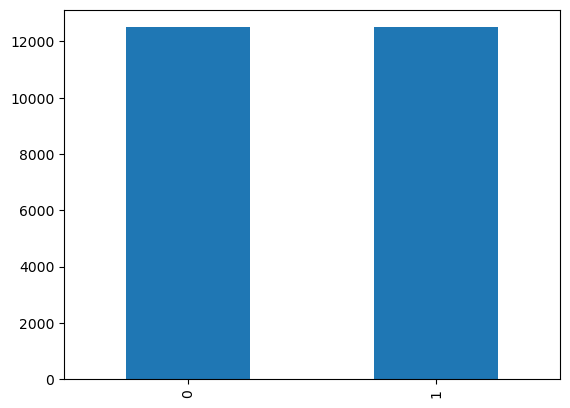

In [26]:
# See Total In Count
df['category'].value_counts().plot.bar()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Sample Image
    </h3>
</div>

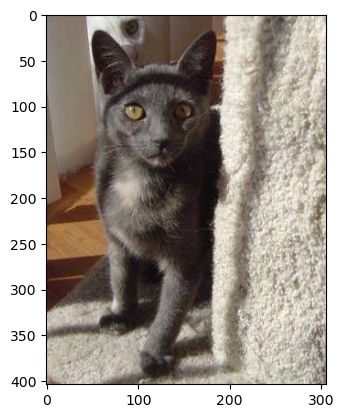

In [27]:
sample =random.choice(filenames)
img = np.asarray(Image.open("/kaggle/working/train/train/"+sample))
# image = load_img()
plt.imshow(img)

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Prepare Test and Train Data
    </h3>
</div>

In [28]:
# df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [29]:
train_df, validate_df = train_test_split(df, test_size=0.2)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()


total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [30]:
validate_df

,index,filename,category
0,5065,cat.7341.jpg,0
1,13453,dog.6067.jpg,1
2,19797,cat.427.jpg,0
3,12989,cat.6865.jpg,0
4,13271,dog.11512.jpg,1
...,...,...,...
4995,12465,dog.2085.jpg,1
4996,21687,cat.2121.jpg,0
4997,23989,dog.4574.jpg,1
4998,2420,dog.9856.jpg,1


In [31]:
train_df['category']=train_df['category'].astype(str)
validate_df['category']=validate_df['category'].astype(str)
# # train_df


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Training Image Generator
    </h3>
</div>

In [32]:

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 10
batch_size = 16

In [33]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/kaggle/working/train/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Validation Image Generator
    </h3>
</div>

In [34]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/kaggle/working/train/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [35]:
print(validation_generator.class_indices)
print(validation_generator.n)
print(len(validation_generator))
# print(validation_generator)
# validation_generator

{'0': 0, '1': 1}
5000
313


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Sample Images Generated
    </h3>
</div>

Found 1 validated image filenames belonging to 1 classes.


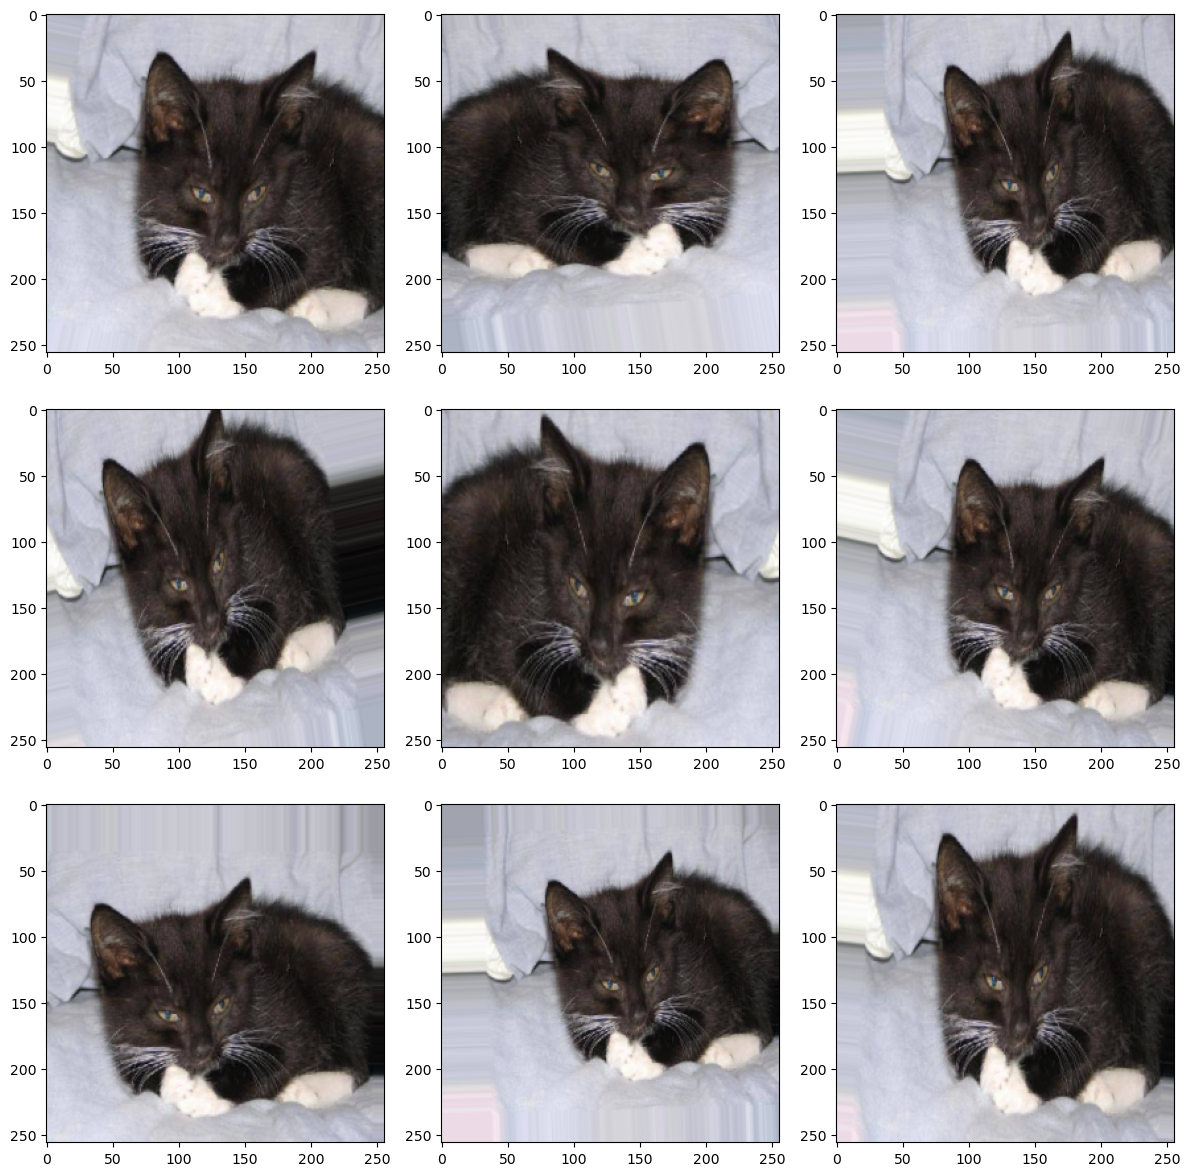

In [36]:
example_df = train_df.sample(n=1).reset_index(drop = True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/kaggle/working/train/train/",
    x_col='filename',
    y_col='category',
    class_mode='categorical'
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

<div id='3'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Model Training
    </h1>
</div>

In [37]:


pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

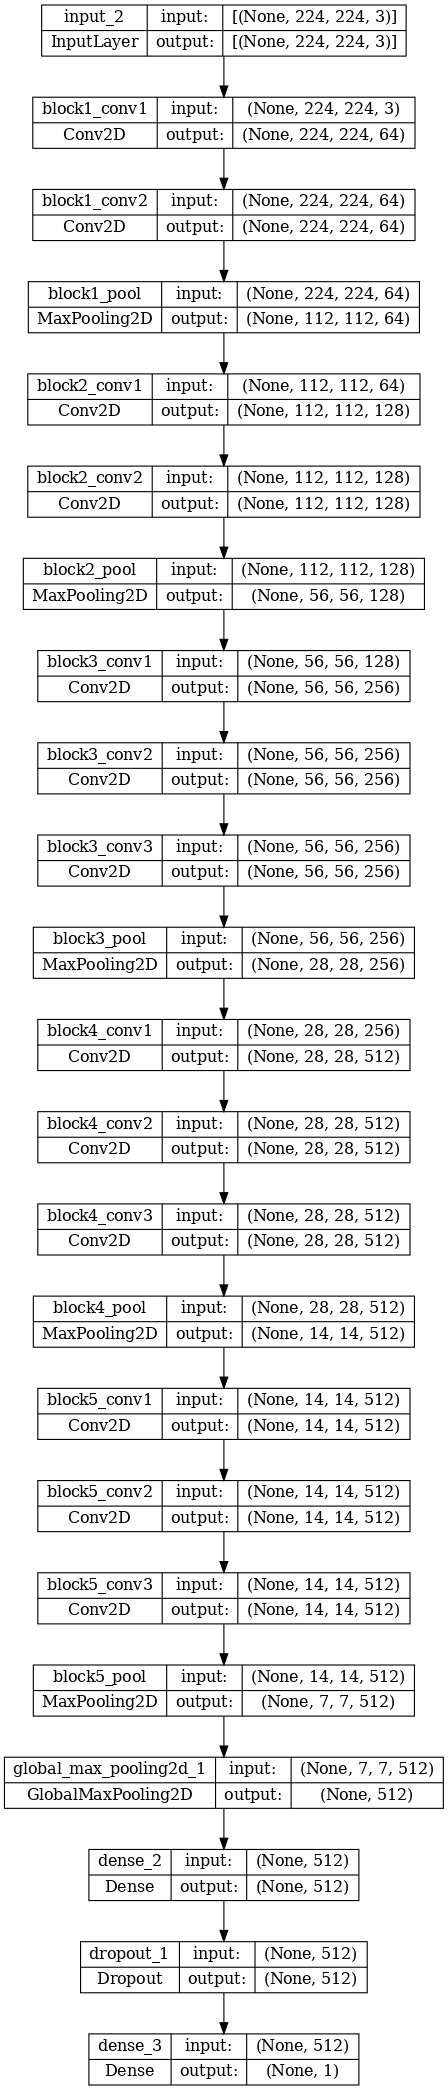

In [38]:
from keras.utils import plot_model
plot_model(model, show_shapes = True,expand_nested = True,dpi = 80)

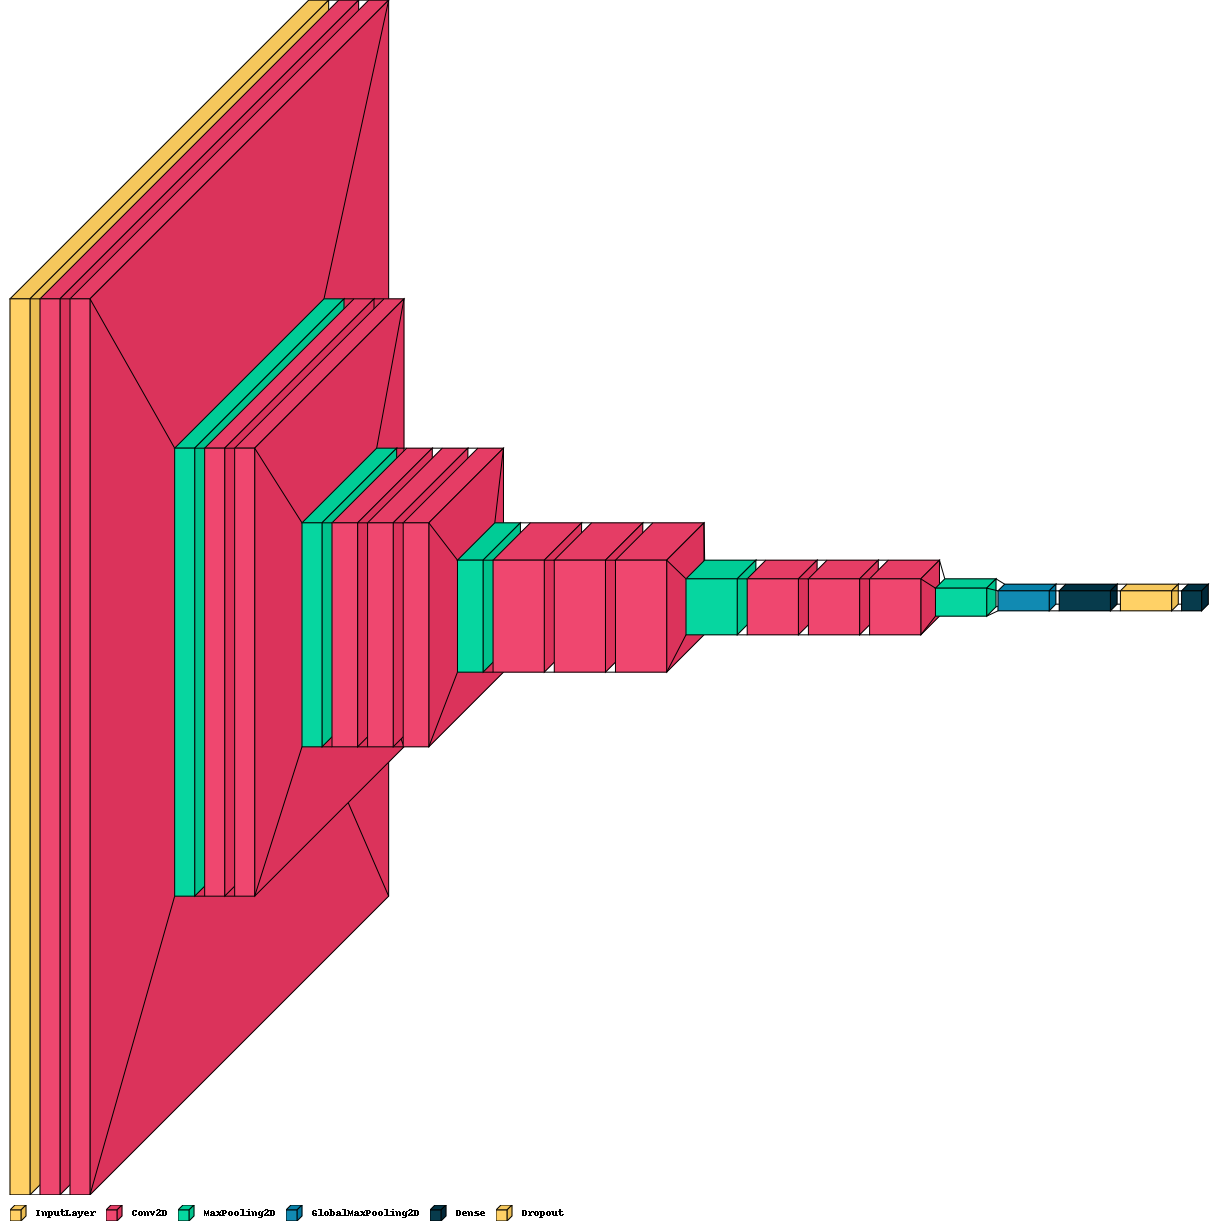

In [39]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True) 

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> FIT MODEL
    </h3>
</div>

In [40]:
# fine-tune the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)


Epoch 1/10
1250/1250 [==============================] - 284s 225ms/step - loss: 0.3164 - accuracy: 0.8517 - val_loss: 0.1340 - val_accuracy: 0.9465
Epoch 2/10
1250/1250 [==============================] - 281s 225ms/step - loss: 0.1540 - accuracy: 0.9372 - val_loss: 0.1058 - val_accuracy: 0.9589
Epoch 3/10
1250/1250 [==============================] - 284s 227ms/step - loss: 0.1271 - accuracy: 0.9479 - val_loss: 0.0937 - val_accuracy: 0.9631
Epoch 4/10
1250/1250 [==============================] - 280s 224ms/step - loss: 0.1126 - accuracy: 0.9538 - val_loss: 0.0865 - val_accuracy: 0.9669
Epoch 5/10
1250/1250 [==============================] - 280s 224ms/step - loss: 0.1038 - accuracy: 0.9585 - val_loss: 0.0819 - val_accuracy: 0.9679
Epoch 6/10
1250/1250 [==============================] - 283s 226ms/step - loss: 0.0942 - accuracy: 0.9624 - val_loss: 0.1134 - val_accuracy: 0.9575
Epoch 7/10
1250/1250 [==============================] - 279s 223ms/step - loss: 0.0874 - accuracy: 0.9642 - val_

<div id='4'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Evaluation
    </h1>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Accuracy
    </h3>
</div>

In [41]:
loss, accuracy = model.evaluate(train_generator, verbose=1)
print("Train : accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss_v, accuracy_v = model.evaluate(validation_generator, verbose=1)
print("Validation : accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))

model.save("finalmodel.h5")

1250/1250 [==============================] - 260s 208ms/step - loss: 0.0655 - accuracy: 0.9725
Train : accuracy = 0.972500  ;  loss = 0.065509
313/313 [==============================] - 19s 62ms/step - loss: 0.0736 - accuracy: 0.9706
Validation : accuracy = 0.970600  ;  loss_v = 0.073626


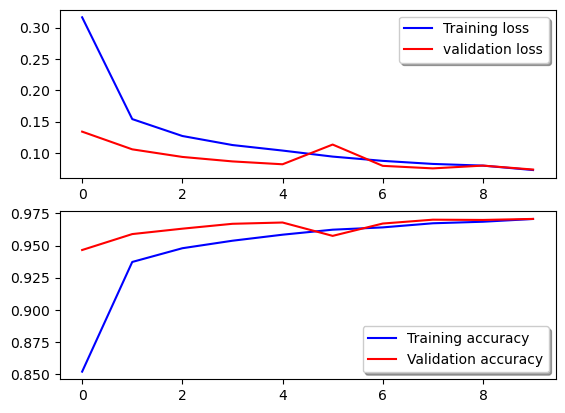

In [42]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Prepare Testing Data
    </h1>
</div>

In [43]:
test_filenames = os.listdir("/kaggle/working/test/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Test Image Generator
    </h3>
</div>

In [44]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/kaggle/working/test/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 12500 validated image filenames.


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Test Image Generator
    </h3>
</div>

In [45]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

<div id='6'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Submission
    </h1>
</div>

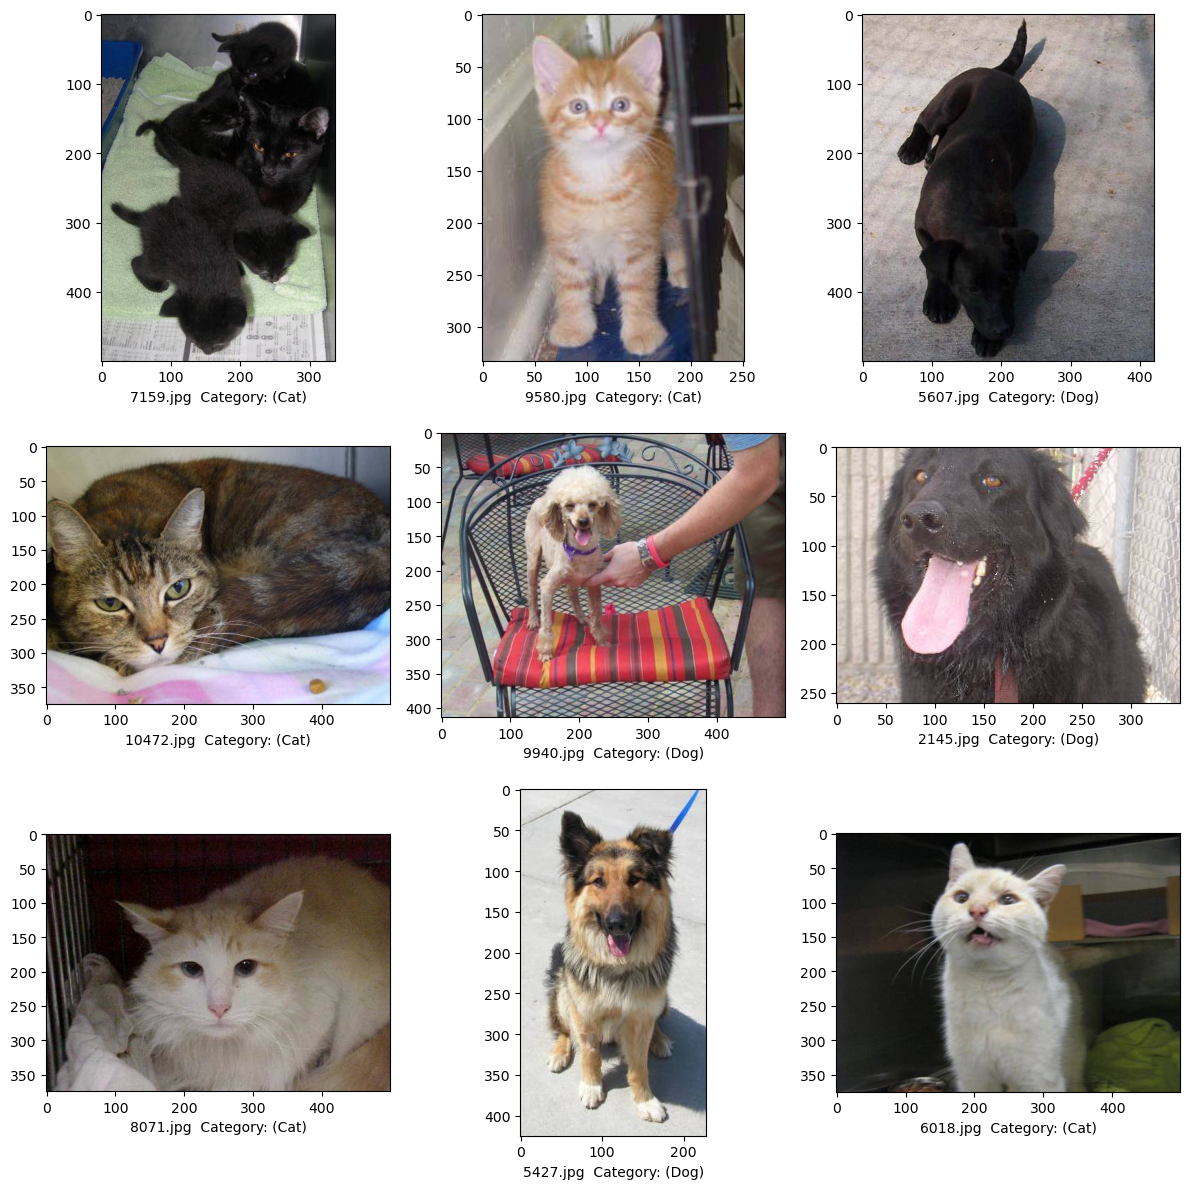

In [46]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = 'Cat'if row['category']==0 else 'Dog'
    img = np.asarray(Image.open("/kaggle/working/test/test1/"+filename))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '  Category: (' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [47]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_1.csv', index=False)

<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #0E8388;">
    <h1 style = "padding: 30px; 
                 color: white;
                 font-weight:600;
                 font-size:50px;
                 text-align: CENTER;
                 font-family: Tilt Warp;">PLEASE UPVOTE IF IT HELPED
    </h1>
</div>